In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [27]:
df = pd.read_csv("../data.csv")

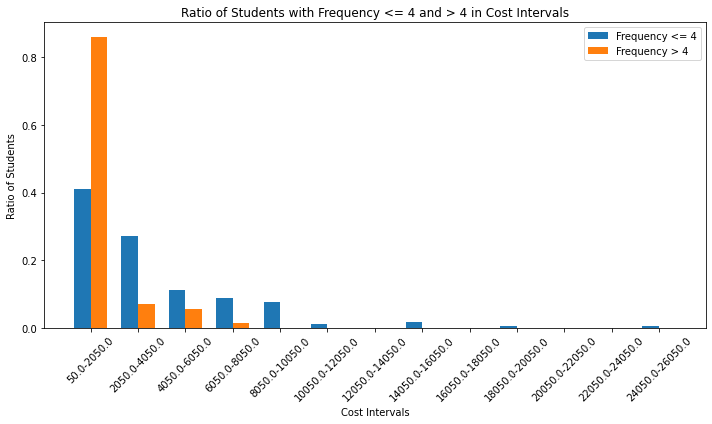

In [28]:
cost_intervals = np.arange(df['cost'].min(), df['cost'].max() + 2000, 2000)

grouped = df.groupby(pd.cut(df['cost'], cost_intervals))

counts = grouped['freq'].value_counts().unstack(fill_value=0)

# Merge '<=4' and '>4' groups
counts['<=4'] = counts['<2'] + counts['3-4']
counts['>4'] = counts['5-10'] + counts['>10']
counts = counts[['<=4', '>4']]  # Keep only merged groups


total_students_freq_leq_4 = counts['<=4'].sum()
total_students_freq_gt_4 = counts['>4'].sum()

# Calculate the ratio for each cost interval
ratios_leq_4 = counts['<=4'] / total_students_freq_leq_4
ratios_gt_4 = counts['>4'] / total_students_freq_gt_4


fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = np.arange(len(cost_intervals) - 1)  # Reduce the length by 1 to match ratios_leq_4 and ratios_gt_4

ax.bar(x - bar_width/2, ratios_leq_4, bar_width, label='Frequency <= 4')
ax.bar(x + bar_width/2, ratios_gt_4, bar_width, label='Frequency > 4')

plt.xlabel('Cost Intervals')
plt.ylabel('Ratio of Students')
plt.title('Ratio of Students with Frequency <= 4 and > 4 in Cost Intervals')
plt.xticks(x, [f'{cost}-{cost+2000}' for cost in cost_intervals[:-1]], rotation=45)
plt.legend()
plt.tight_layout()

plt.savefig("../All Plots/Cost vs freq (Arin).png", facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)